## Notebook to produce Figure 1 for Chiacchierini et al. (2021)

![Figure 1](./figs/PPP_figs_R2_Fig1.png "Figure 1")

In [1]:
import sys
sys.path.append('..\\helperfx')

# Uncomment these lines to download dataframes for subsequent analysis
# from download_dfs import *
# download_dfs()

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.transforms as transforms

from scipy import stats

import numpy as np
import dabest as db
import pandas as pd
import trompy as tp

from settings4figs import *
from fx4figs import *
from fx4stats import *

%matplotlib inline

In [2]:
xlfile = "..\\stats\\PPP_body weight and food intake.xlsx"
statsfolder = "..\\stats\\"

In [3]:
# Body weight data
df = pd.read_excel(xlfile, sheet_name='PPP_bodyweight')
df.set_index('rat', inplace=True)

df.drop('cage', axis=1, inplace=True)

df.drop(['PPP1.8'], inplace=True)
df.drop(['PPP3.1'], inplace=True)
df.drop(['PPP3.6'], inplace=True)
df.drop(['PPP3.7'], inplace=True)
# df.drop(['PPP3.8'], inplace=True)
df.drop(['PPP4.2'], inplace=True)
df.drop(['PPP4.3'], inplace=True)
df.drop(['PPP4.5'], inplace=True)
df.drop(['PPP4.7'], inplace=True)
df.drop(['PPP4.8'], inplace=True)

df_days = df.loc[:,'d0':'d14']

nr_mean = df_days[df['diet'] == 'NR'].mean()
nr_sem = df_days[df['diet'] == 'NR'].std() / np.sqrt(len(df['diet'] == 'NR'))

pr_mean = df_days[df['diet'] == 'PR'].mean()
pr_sem = df_days[df['diet'] == 'PR'].std() / np.sqrt(len(df['diet'] == 'PR'))

nrd0 = df_days[df['diet'] == 'NR']['d0']
prd0 = df_days[df['diet'] == 'PR']['d0']

nrd14 = df_days[df['diet'] == 'NR']['d14']
prd14 = df_days[df['diet'] == 'PR']['d14']

In [4]:
df.set_index(['diet'], inplace=True, append=True)
df_days = df.loc[:,'d0':'d14']
data = df_days.stack()
data = data.to_frame()
data.reset_index(inplace=True) 
data.columns = ['rat', 'diet', 'day', 'bw']

data.to_csv(statsfolder+"df_days_stacked.csv")

# Food intake data
df = pd.read_excel(xlfile, sheet_name='PPP_foodintake')
df.set_index('cage', inplace=True)

df.drop(['cage_3.5'], inplace=True)
df.drop(['cage_4.4'], inplace=True)

df_days = df.loc[:,'d0':'d14'].mul(1/df['ratspercage'],axis=0)

foodintake_NR = df_days[df['diet'] == 'NR'].mean(axis=1)
foodintake_PR = df_days[df['diet'] == 'PR'].mean(axis=1)

fi = [foodintake_NR, foodintake_PR]

### Panel C - Body weight over days

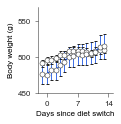

In [5]:
fig1C = plt.figure(figsize=(1.6,2))
fig1C.subplots_adjust(wspace=0.01, hspace=0.6, top=0.85, bottom=0.25, left=0.3, right=0.95)

markersize=5

# Makes bodyweight subplot
ax1 = fig1C.add_subplot()
nr_mean.plot(yerr=nr_sem, linewidth=1, color='xkcd:charcoal', marker='o', markersize=markersize, markerfacecolor='white', capthick=1, elinewidth=0.75, capsize=1.5)
pr_mean.plot(yerr=pr_sem, linewidth=1, color=col['pr_cas'], marker='o', markersize=markersize, markerfacecolor='white', capthick=1, elinewidth=0.75, capsize=1.5)
ax1.set_ylim([450, 570])
ax1.set_xlim([-1, 16])
ax1.set_xticks([1,8,15])
ax1.set_xticklabels(['0', '7', '14'], fontsize=8)
ax1.set_yticks([450, 500, 550])
ax1.set_yticklabels([450, 500, 550], fontsize=8)
ax1.set_ylabel('Body weight (g)', fontsize=8)
ax1.set_xlabel('Days since diet switch', fontsize=8)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

In [6]:
stats_bodyweight()

0 Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
Warning messages:
1: In log(det(U)) : NaNs produced
2: In log(det(U)) : NaNs produced
 $ANOVA
    Effect DFn DFd          F            p p<.05         ges
2     diet   1  13  0.0917999 7.666953e-01       0.006855371
3      day  14 182 25.0167950 3.238360e-35     * 0.041490044
4 diet:day  14 182  3.9731460 5.899018e-06     * 0.006827705




In [7]:
d0_stats = stats.ttest_ind(nrd0, prd0)
d14_stats = stats.ttest_ind(nrd14, prd14)

print("Difference in body weight between NR and PR rats on Day 0: p={:.3f}".format(d0_stats[1]))
print("Difference in body weight between NR and PR rats on Day 14: p={:.3f}".format(d14_stats[1]))

Difference in body weight between NR and PR rats on Day 0: p=0.486
Difference in body weight between NR and PR rats on Day 14: p=0.881


### Panel D - Food intake

C:\ProgramData\Anaconda3\envs\ppp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


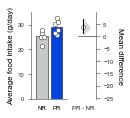

In [8]:
df1 = pd.DataFrame(fi[0])
df1.reset_index(inplace=True)
df1.columns = ["cage", "NR"]

df2 = pd.DataFrame(fi[1])
df2.reset_index(inplace=True)
df2.columns = ["cage", "PR"]

df_new = pd.concat([df1, df2], sort=True)

gs = gridspec.GridSpec(1, 2, width_ratios=[2,1], wspace=0.4)
fig1D = plt.figure(figsize=(1.7,2))
fig1D.subplots_adjust(wspace=0.0, hspace=0.6, top=0.85, bottom=0.25, left=0.22, right=0.75)
    
ax2 = fig1D.add_subplot(gs[0,0])
_, barx, _, _ = tp.barscatter(fi, barfacecoloroption='individual',
                  barwidth = 0.8,
                  barfacecolor = [col['nr_cas'], col['pr_cas']],
                  scatteredgecolor = ['xkcd:charcoal'],
                  scattersize = 20,
                  spaced=True,
                  ax=ax2)
ax2.set_yticks([0, 10, 20, 30])
ax2.set_xlim([0.25,2.75])
ax2.set_ylim([0, 35])
ax2.set_ylabel("Average food intake (g/day)", fontsize=8)

grouplabel=['NR', 'PR']

for x, label in zip(barx, grouplabel):
    ax2.text(x, -2.8, label, ha="center", va="top", fontsize=6)
    
ax3 = fig1D.add_subplot(gs[0,1])
    
est_data = db.load(data=df_new, idx=("NR", "PR"))

e = est_data.mean_diff
results = e.results

contrast_xtick_labels = []

dabest_obj  = e.dabest_obj
plot_data   = e._plot_data
xvar        = e.xvar
yvar        = e.yvar
is_paired   = e.is_paired


all_plot_groups = dabest_obj._all_plot_groups
idx             = dabest_obj.idx

default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                           'showextrema':False, 'showmedians':False}
    
violinplot_kwargs = default_violinplot_kwargs

ticks_to_skip   = np.cumsum([len(t) for t in idx])[:-1].tolist()
ticks_to_skip.insert(0, 0)

# Then obtain the ticks where we have to plot the effect sizes.
ticks_to_plot = [t for t in range(0, len(all_plot_groups))
                if t not in ticks_to_skip]

ticks_to_plot = [barx[tick] for tick in ticks_to_plot]

fcolors = [col['nr_cas'], col['pr_cas']]

for j, tick in enumerate(ticks_to_plot):
    current_group     = results.test[j]
    current_control   = results.control[j]
    current_bootstrap = results.bootstraps[j]
    current_effsize   = results.difference[j]
    current_ci_low    = results.bca_low[j]
    current_ci_high   = results.bca_high[j]
    
#     # Create the violinplot.
    v = ax3.violinplot(current_bootstrap[~np.isinf(current_bootstrap)],
                                  positions=[tick],
                                  **violinplot_kwargs)



    halfviolin_alpha=0.7
    halfviolin(v, fill_color=fcolors[j], alpha=halfviolin_alpha)

    ytick_color="black"
    es_marker_size=4

#     # Plot the effect size.
    ax3.plot([tick], current_effsize, marker='o',
                        color=ytick_color,
                        markersize=es_marker_size)
    # Plot the confidence interval.
    ax3.plot([tick, tick],
                        [current_ci_low, current_ci_high],
                        linestyle="-",
                        color=ytick_color,
                        # linewidth=group_summary_kwargs['lw'],
                        linewidth=1)
    
ax3.spines["bottom"].set_visible(False)
ax3.spines["right"].set_visible(True)
ax3.spines["left"].set_visible(False)

ax3.yaxis.set_ticks_position("right")
ax3.yaxis.set_label_position("right")

# ax1.set_ylim([16, 34])
lims = ax2.get_ylim()
nr_mean = np.mean(fi[0])
lims2 = lims-nr_mean
ax3.set_ylim(lims2)

ax3.axhline(0, color='k', zorder=-20)

ax3.set_xticks([2])
ax3.set_xticklabels(["PR - NR"])
ax3.set_xlim([1.8, 2.5])

ax3.set_ylabel("Mean difference", rotation=270, fontsize=8, va="bottom")

ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    labelbottom=True) # labels along the bottom edge are off


In [9]:
print("Difference in food intake between NR and PR rats: {:.2f} g [95% CI {:.2f}, {:.2f}], p={:.3f}".format(
    results["difference"][0],
    results["bca_low"][0],
    results["bca_high"][0],
    results["pvalue_permutation"][0]))

Difference in food intake between NR and PR rats: 3.77 g [95% CI 1.28, 6.88], p=0.042


### Panel E - Intake during conditioning sessions

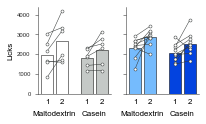

In [10]:
cas_sessions = ['cond1-cas1', 'cond1-cas2']
malt_sessions = ['cond1-malt1', 'cond1-malt2']  

fig1E, ax = plt.subplots(figsize=(3.2, 2), nrows=1, ncols=2, sharey=True, gridspec_kw={
    "left": 0.2, "bottom": 0.25, "top": 0.85}) 
df = df_cond
dietmsk = df['diet'] == 'NR'
cols = [col["nr_malt"]]*2 + [col["nr_cas"]]*2
barx = condfigs(df, malt_sessions+cas_sessions, dietmsk, cols, ax[0])

dietmsk = df['diet'] == 'PR'
cols = [col["pr_malt"]]*2 + [col["pr_cas"]]*2
barx = condfigs(df, malt_sessions+cas_sessions, dietmsk, cols, ax[1])

ax[0].set_ylabel('Licks', fontsize=8)
ax[0].set_yticks([0, 1000, 2000, 3000, 4000])

yrange = ax[0].get_ylim()[1] - ax[0].get_ylim()[0]
grouplabel=['Maltodextrin', 'Casein', ]
barlabels=['1','2','1','2']
barlabeloffset=ax[0].get_ylim()[0] - yrange*0.06
grouplabeloffset=ax[0].get_ylim()[0] - yrange*0.2
for ax in ax:
    for x, label in zip(barx, barlabels):
        ax.text(x, barlabeloffset, label, va='top', ha='center', fontsize=8)
    for x, label in zip([1,2], grouplabel):
        ax.text(x, grouplabeloffset, label, va='top', ha='center', fontsize=8)

In [11]:
# Used the following csv file for conducting stats in SPSS because 3 way ANOVA
csvfile=statsfolder+'cond1_behav.csv'
df_cond.to_csv(csvfile)

<!DOCTYPE html>
<html>
<head>
<title>OUTPUT.htm</title>
<meta charset="utf-8"/>
<style type="text/css">.details{position: absolute;left: -9999px;}
.IELargeImage{display:inline-block;font-family: Arial, Helvetica, sans-serif;font-size: medium;color:#ff0000;font-weight:normal;vertical-align:middle;}</style></head>
<body>
<p align="left"><html><BR>  <head><BR>    <style type="text/css"><BR>      <!--<BR>        p { color: 000000; font-family: Monospaced; font-size: 14pt; font-style: normal; font-weight: normal; text-decoration: none }<BR>      --><BR>    </style><BR>    <BR>  </head><BR>  <body><BR>    <font size="4" face="Monospaced" color="#000000">PRESERVE.<br>SET&#160;DECIMAL&#160;DOT.<br><br>GET&#160;DATA&#160;&#160;/TYPE=TXT<br>&#160;&#160;/FILE=&quot;C:\Github\PPP_analysis\stats\cond1_behav.csv&quot;<br>&#160;&#160;/ENCODING='UTF8'<br>&#160;&#160;/DELIMITERS=&quot;,&quot;<br>&#160;&#160;/QUALIFIER='&quot;'<br>&#160;&#160;/ARRANGEMENT=DELIMITED<br>&#160;&#160;/FIRSTCASE=2<br>&#160;&#160;/DATATYPEMIN&#160;PERCENTAGE=95.0<br>&#160;&#160;/VARIABLES=<br>&#160;&#160;rat&#160;AUTO<br>&#160;&#160;diet&#160;AUTO<br>&#160;&#160;cond1cas1&#160;AUTO<br>&#160;&#160;cond1malt1&#160;AUTO<br>&#160;&#160;cond1cas2&#160;AUTO<br>&#160;&#160;cond1malt2&#160;AUTO<br>&#160;&#160;cond1casall&#160;AUTO<br>&#160;&#160;cond1maltall&#160;AUTO<br>&#160;&#160;/MAP.<br>RESTORE.<br>CACHE.<br>EXECUTE.<br><br>Data&#160;written&#160;to&#160;the&#160;working&#160;file.<br>8&#160;variables&#160;and&#160;15&#160;cases&#160;written.<br>Variable:&#160;rat&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;String&#160;&#160;Format&#160;:&#160;A6<br>Variable:&#160;diet&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;String&#160;&#160;Format&#160;:&#160;A2<br>Variable:&#160;cond1cas1&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;Number&#160;&#160;Format&#160;:&#160;F6.1<br>Variable:&#160;cond1malt1&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;Number&#160;&#160;Format&#160;:&#160;F6.1<br>Variable:&#160;cond1cas2&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;Number&#160;&#160;Format&#160;:&#160;F6.1<br>Variable:&#160;cond1malt2&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;Number&#160;&#160;Format&#160;:&#160;F6.1<br>Variable:&#160;cond1casall&#160;&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;Number&#160;&#160;Format&#160;:&#160;F6.1<br>Variable:&#160;cond1maltall&#160;&#160;&#160;&#160;&#160;&#160;&#160;Type:&#160;Number&#160;&#160;Format&#160;:&#160;F6.1<br><br>Substitute&#160;the&#160;following&#160;to&#160;build&#160;syntax&#160;for&#160;these&#160;data.<br>&#160;&#160;/VARIABLES=<br>&#160;&#160;&#160;rat&#160;A6<br>&#160;&#160;&#160;diet&#160;A2<br>&#160;&#160;&#160;cond1cas1&#160;F6.1<br>&#160;&#160;&#160;cond1malt1&#160;F6.1<br>&#160;&#160;&#160;cond1cas2&#160;F6.1<br>&#160;&#160;&#160;cond1malt2&#160;F6.1<br>&#160;&#160;&#160;cond1casall&#160;F6.1<br>&#160;&#160;&#160;cond1maltall&#160;F6.1<br><br>DATASET&#160;NAME&#160;DataSet1&#160;WINDOW=FRONT.<br>GLM&#160;cond1cas1&#160;cond1malt1&#160;cond1cas2&#160;cond1malt2&#160;BY&#160;diet<br>&#160;&#160;/WSFACTOR=session&#160;2&#160;Polynomial&#160;solution&#160;2&#160;Polynomial<br>&#160;&#160;/METHOD=SSTYPE(3)<br>&#160;&#160;/POSTHOC=diet(SIDAK)<br>&#160;&#160;/PRINT=HOMOGENEITY<br>&#160;&#160;/CRITERIA=ALPHA(.05)<br>&#160;&#160;/WSDESIGN=session&#160;solution&#160;session*solution<br>&#160;&#160;/DESIGN=diet.</font><BR>  </body><BR></html><BR></p><BR><CENTER><H1><b><head><style type="text/css">p{color:0;font-family:SansSerif;font-size:18pt;font-style:normal;font-weight:bold;text-decoration:none}</style></head><BR>General&nbsp;Linear&nbsp;Model</b></H1></CENTER><BR>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Notes, table, 0 levels of column headers and 2 levels of row headers, table with 3 columns and 14 rows" style="width:471px" class="Default PivotTable" aria-label="Notes" role="complementary" data-lookName="Default" data-rowLabelWidth="2" data-colLabelHeight="0" data-NumRows="13" data-NumCols="1" data-rowLabels="Corner" data-decimal-char="." data-col-labels="" data-row-labels="Output Created ;Comments ;Input Data; Active Dataset; Filter; Weight; Split File; N of Rows in Working Data File;Missing Value Handling Definition of Missing; Cases Used;Syntax ;Resources Processor Time; Elapsed Time" data-layer-dimension="" data-column-dimension="" data-row-dimension="Contents;" data-maxColWidth="122">
<caption class="title" style="width:471px">Notes<span class="details">Notes, table, 0 levels of column headers and 2 levels of row headers, table with 3 columns and 14 rows</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="rowLabels dataAreaTop role3" colspan="2">Output Created</td>
<td class=" o dataAreaTop dataAreaLeft">23-JAN-2020 16:16:42</td>
</tr>
<tr>
<td class="rowLabels hCR role3" colspan="2">Comments</td>
<td class=" e dataAreaLeft hCR" style="text-align:left;">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR role2" rowspan="6">Input</td>
<td class="rowLabels hCR vCR role3">Data</td>
<td class=" o dataAreaLeft hCR" style="text-align:left;">C:\Github\PPP_analysis\stats\cond1_behav.csv</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Active Dataset</td>
<td class=" e dataAreaLeft hCR" style="text-align:left;">DataSet1</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Filter</td>
<td class=" o dataAreaLeft hCR" style="text-align:left;">&lt;none&gt;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Weight</td>
<td class=" e dataAreaLeft hCR" style="text-align:left;">&lt;none&gt;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Split File</td>
<td class=" o dataAreaLeft hCR" style="text-align:left;">&lt;none&gt;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">N of Rows in Working Data File</td>
<td class=" e dataAreaLeft hCR">15</td>
</tr>
<tr>
<td class="rowLabels hCR role2" rowspan="2">Missing Value Handling</td>
<td class="rowLabels hCR vCR role3">Definition of Missing</td>
<td class=" o dataAreaLeft hCR" style="text-align:left;">User-defined missing values are treated as missing.</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Cases Used</td>
<td class=" e dataAreaLeft hCR" style="text-align:left;">Statistics are based on all cases with valid data for all variables in the model.</td>
</tr>
<tr>
<td class="rowLabels hCR role3" colspan="2">Syntax</td>
<td class=" o dataAreaLeft hCR" style="text-align:left;">GLM cond1cas1 cond1malt1 cond1cas2 cond1malt2 BY diet<br>  /WSFACTOR=session 2 Polynomial solution 2 Polynomial<br>  /METHOD=SSTYPE(3)<br>  /POSTHOC=diet(SIDAK)<br>  /PRINT=HOMOGENEITY<br>  /CRITERIA=ALPHA(.05)<br>  /WSDESIGN=session solution session*solution<br>  /DESIGN=diet.</td>
</tr>
<tr>
<td class="rowLabels hCR role2" rowspan="2">Resources</td>
<td class="rowLabels hCR vCR role3">Processor Time</td>
<td class=" e dataAreaLeft hCR">00:00:00.00</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Elapsed Time</td>
<td class=" o dataAreaLeft hCR">00:00:00.01</td>
</tr>
<tr>
<td  style="width:149px;padding:0px;border-spacing:0px"></td>
<td  style="width:160px;padding:0px;border-spacing:0px"></td>
<td  style="width:162px;padding:0px;border-spacing:0px"></td>
</tr>
</tbody>
</table>
</div><p align="left"><head><style type="text/css">p{color:0;font-family:Monospaced;font-size:14pt;font-style:normal;font-weight:normal;text-decoration:none}</style></head><BR>[DataSet1]&nbsp;</p><BR>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Warnings, table, 0 levels of column headers and 0 levels of row headers, table with 1 columns and 2 rows" style="width:360px" class="Default PivotTable" aria-label="Warnings" role="complementary" data-lookName="Default" data-rowLabelWidth="0" data-colLabelHeight="0" data-NumRows="1" data-NumCols="1" data-rowLabels="Corner" data-decimal-char="." data-col-labels="" data-row-labels="" data-layer-dimension="" data-column-dimension="" data-row-dimension="ERROR;" data-maxColWidth="270">
<caption class="title" style="width:360px">Warnings<span class="details">Warnings, table, 0 levels of column headers and 0 levels of row headers, table with 1 columns and 2 rows</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class=" o dataAreaTop dataAreaLeft" style="text-align:left;">Post hoc tests are not performed for diet because there are fewer than three groups.</td>
</tr>
<tr>
<td  style="width:360px;padding:0px;border-spacing:0px"></td>
</tr>
</tbody>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Within-Subjects Factors, table, Measure, MEASURE_1, 1 layers, 1 levels of column headers and 2 levels of row headers, table with 3 columns and 7 rows" style="width:223px" class="Default PivotTable" aria-label="Within-Subjects Factors" role="complementary" data-lookName="Default" data-rowLabelWidth="2" data-colLabelHeight="1" data-NumRows="4" data-NumCols="1" data-rowLabels="Corner" data-decimal-char="." data-col-labels="Dependent Variable" data-row-labels="1 1; 2;2 1; 2" data-layer-dimension="Measure;" data-column-dimension="DepVar;" data-row-dimension="session;solution;" data-maxColWidth="72">
<caption class="title" style="width:223px">Within-Subjects Factors<span class="details">Within-Subjects Factors, table, Measure, MEASURE_1, 1 layers, 1 levels of column headers and 2 levels of row headers, table with 3 columns and 7 rows</span></caption>
<tr class="layerInfo">
<td class="defaultLayer layers titleLayerSeparator" colspan="3">
<table class="defaultLayer">
<tr>
<td colspan="1">Measure: </td>
<td colspan="1">MEASURE_1</td>
</tr>
</table></td>
</tr>

<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels">session</td>
<td class="cornerLabels">solution</td>
<td class="columnLabels dataAreaLeft vCC role3">Dependent Variable</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role3" rowspan="2">1</td>
<td class="rowLabels dataAreaTop vCR role3">1</td>
<td class=" o dataAreaTop dataAreaLeft vCC" style="text-align:left;">cond1cas1</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">2</td>
<td class=" e dataAreaLeft hCR vCC" style="text-align:left;">cond1malt1</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="2">2</td>
<td class="rowLabels hCR vCR role3">1</td>
<td class=" o dataAreaLeft hCR vCC" style="text-align:left;">cond1cas2</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">2</td>
<td class=" e dataAreaLeft hCR vCC" style="text-align:left;">cond1malt2</td>
</tr>
<tr>
<td  style="width:64px;padding:0px;border-spacing:0px"></td>
<td  style="width:63px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
</tr>
</tbody>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Between-Subjects Factors, table, 1 levels of column headers and 2 levels of row headers, table with 3 columns and 4 rows" style="width:163px" class="Default PivotTable" aria-label="Between-Subjects Factors" role="complementary" data-lookName="Default" data-rowLabelWidth="2" data-colLabelHeight="1" data-NumRows="2" data-NumCols="1" data-rowLabels="Corner" data-decimal-char="." data-col-labels="N" data-row-labels="diet NR; PR" data-layer-dimension="" data-column-dimension="Properties;" data-row-dimension="Factor Levels;" data-maxColWidth="72">
<caption class="title" style="width:163px">Between-Subjects Factors<span class="details">Between-Subjects Factors, table, 1 levels of column headers and 2 levels of row headers, table with 3 columns and 4 rows</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" colspan="2">&nbsp;</td>
<td class="columnLabels dataAreaLeft vCC role3">N</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role2" rowspan="2">diet</td>
<td class="rowLabels dataAreaTop vCR role3">NR</td>
<td class=" e dataAreaTop dataAreaLeft vCC">6</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">PR</td>
<td class=" o dataAreaLeft hCR vCC">9</td>
</tr>
<tr>
<td  style="width:48px;padding:0px;border-spacing:0px"></td>
<td  style="width:48px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
</tr>
</tbody>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Box's Test of Equality of Covariance Matrices, table, 0 levels of column headers and 1 levels of row headers, table with 2 columns and 8 rows" style="width:127px" class="Default PivotTable" aria-label="Box's Test of Equality of Covariance Matrices" role="complementary" data-lookName="Default" data-rowLabelWidth="1" data-colLabelHeight="0" data-NumRows="5" data-NumCols="1" data-rowLabels="Corner" data-decimal-char="." data-col-labels="" data-row-labels="Box's M;F;df1;df2;Sig." data-layer-dimension="" data-column-dimension="" data-row-dimension="Statistics;" data-maxColWidth="72">
<caption class="title" style="width:127px" title="a. Design: Intercept + diet 
 Within Subjects Design: session + solution + session * solution">Box's Test of Equality of Covariance Matrices<sup>a</sup><span class="details">Box's Test of Equality of Covariance Matrices, table, 0 levels of column headers and 1 levels of row headers, table with 2 columns and 8 rows</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="rowLabels dataAreaTop role3">Box's M</td>
<td class=" o dataAreaTop dataAreaLeft">12.558</td>
</tr>
<tr>
<td class="rowLabels hCR role3">F</td>
<td class=" e dataAreaLeft hCR">.786</td>
</tr>
<tr>
<td class="rowLabels hCR role3">df1</td>
<td class=" o dataAreaLeft hCR">10</td>
</tr>
<tr>
<td class="rowLabels hCR role3">df2</td>
<td class=" e dataAreaLeft hCR">528.901</td>
</tr>
<tr>
<td class="rowLabels hCR role3">Sig.</td>
<td class=" o dataAreaLeft hCR">.643</td>
</tr>
</tbody><tfoot style="display:table-footer-group">
<tr>
<td class="caption" colspan="2">Tests the null hypothesis that the observed covariance matrices of the dependent variables are equal across groups.</td>
</tr>
<tr>
<td class="footnotes" colspan="2">a. Design: Intercept + diet <br> Within Subjects Design: session + solution + session * solution</td>
</tr>
<tr>
<td  style="width:60px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
</tr>
</tfoot>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Multivariate Tests, table, 1 levels of column headers and 2 levels of row headers, table with 7 columns and 28 rows" style="width:635px" class="Default PivotTable" aria-label="Multivariate Tests" role="complementary" data-lookName="Default" data-rowLabelWidth="2" data-colLabelHeight="1" data-NumRows="24" data-NumCols="5" data-rowLabels="Corner" data-decimal-char="." data-col-labels="Value;F;Hypothesis df;Error df;Sig." data-row-labels="session Pillai's Trace; Wilks' Lambda; Hotelling's Trace; Roy's Largest Root;session * diet Pillai's Trace; Wilks' Lambda; Hotelling's Trace; Roy's Largest Root;solution Pillai's Trace; Wilks' Lambda; Hotelling's Trace; Roy's Largest Root;solution * diet Pillai's Trace; Wilks' Lambda; Hotelling's Trace; Roy's Largest Root;session * solution Pillai's Trace; Wilks' Lambda; Hotelling's Trace; Roy's Largest Root;session * solution * diet Pillai's Trace; Wilks' Lambda; Hotelling's Trace; Roy's Largest Root" data-layer-dimension="" data-column-dimension="Statistics;" data-row-dimension="Effect;Test;" data-maxColWidth="72">
<caption class="title" style="width:635px" title="a. Design: Intercept + diet 
 Within Subjects Design: session + solution + session * solution">Multivariate Tests<sup>a</sup><span class="details">Multivariate Tests, table, 1 levels of column headers and 2 levels of row headers, table with 7 columns and 28 rows</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" colspan="2">Effect</td>
<td class="columnLabels dataAreaLeft vCC role3">Value</td>
<td class="columnLabels vCC role3">F</td>
<td class="columnLabels vCC role3">Hypothesis df</td>
<td class="columnLabels vCC role3">Error df</td>
<td class="columnLabels vCC role3">Sig.</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role3" rowspan="4">session</td>
<td class="rowLabels dataAreaTop vCR role3">Pillai's Trace</td>
<td class=" e dataAreaTop dataAreaLeft vCC">.632</td>
<td class=" e dataAreaTop vCC" title="b. Exact statistic">22.308<sup>b</sup></td>
<td class=" e dataAreaTop vCC">1.000</td>
<td class=" e dataAreaTop vCC">13.000</td>
<td class=" e dataAreaTop vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Wilks' Lambda</td>
<td class=" o dataAreaLeft hCR vCC">.368</td>
<td class=" o hCR vCC" title="b. Exact statistic">22.308<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Hotelling's Trace</td>
<td class=" e dataAreaLeft hCR vCC">1.716</td>
<td class=" e hCR vCC" title="b. Exact statistic">22.308<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Roy's Largest Root</td>
<td class=" o dataAreaLeft hCR vCC">1.716</td>
<td class=" o hCR vCC" title="b. Exact statistic">22.308<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">session * diet</td>
<td class="rowLabels hCR vCR role3">Pillai's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.004</td>
<td class=" e hCR vCC" title="b. Exact statistic">.055<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Wilks' Lambda</td>
<td class=" o dataAreaLeft hCR vCC">.996</td>
<td class=" o hCR vCC" title="b. Exact statistic">.055<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Hotelling's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.004</td>
<td class=" e hCR vCC" title="b. Exact statistic">.055<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Roy's Largest Root</td>
<td class=" o dataAreaLeft hCR vCC">.004</td>
<td class=" o hCR vCC" title="b. Exact statistic">.055<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">solution</td>
<td class="rowLabels hCR vCR role3">Pillai's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.114</td>
<td class=" e hCR vCC" title="b. Exact statistic">1.670<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Wilks' Lambda</td>
<td class=" o dataAreaLeft hCR vCC">.886</td>
<td class=" o hCR vCC" title="b. Exact statistic">1.670<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Hotelling's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.128</td>
<td class=" e hCR vCC" title="b. Exact statistic">1.670<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Roy's Largest Root</td>
<td class=" o dataAreaLeft hCR vCC">.128</td>
<td class=" o hCR vCC" title="b. Exact statistic">1.670<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">solution * diet</td>
<td class="rowLabels hCR vCR role3">Pillai's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.000</td>
<td class=" e hCR vCC" title="b. Exact statistic">.000<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Wilks' Lambda</td>
<td class=" o dataAreaLeft hCR vCC">1.000</td>
<td class=" o hCR vCC" title="b. Exact statistic">.000<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Hotelling's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.000</td>
<td class=" e hCR vCC" title="b. Exact statistic">.000<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Roy's Largest Root</td>
<td class=" o dataAreaLeft hCR vCC">.000</td>
<td class=" o hCR vCC" title="b. Exact statistic">.000<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">session * solution</td>
<td class="rowLabels hCR vCR role3">Pillai's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.047</td>
<td class=" e hCR vCC" title="b. Exact statistic">.643<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Wilks' Lambda</td>
<td class=" o dataAreaLeft hCR vCC">.953</td>
<td class=" o hCR vCC" title="b. Exact statistic">.643<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Hotelling's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.049</td>
<td class=" e hCR vCC" title="b. Exact statistic">.643<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Roy's Largest Root</td>
<td class=" o dataAreaLeft hCR vCC">.049</td>
<td class=" o hCR vCC" title="b. Exact statistic">.643<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">session * solution * diet</td>
<td class="rowLabels hCR vCR role3">Pillai's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.016</td>
<td class=" e hCR vCC" title="b. Exact statistic">.211<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Wilks' Lambda</td>
<td class=" o dataAreaLeft hCR vCC">.984</td>
<td class=" o hCR vCC" title="b. Exact statistic">.211<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Hotelling's Trace</td>
<td class=" e dataAreaLeft hCR vCC">.016</td>
<td class=" e hCR vCC" title="b. Exact statistic">.211<sup>b</sup></td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Roy's Largest Root</td>
<td class=" o dataAreaLeft hCR vCC">.016</td>
<td class=" o hCR vCC" title="b. Exact statistic">.211<sup>b</sup></td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">.654</td>
</tr>
</tbody><tfoot style="display:table-footer-group">
<tr>
<td class="footnotes" colspan="7">a. Design: Intercept + diet <br> Within Subjects Design: session + solution + session * solution</td>
</tr>
<tr>
<td class="footnotes" colspan="7">b. Exact statistic</td>
</tr>
<tr>
<td  style="width:150px;padding:0px;border-spacing:0px"></td>
<td  style="width:123px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:94px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
</tr>
</tfoot>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Mauchly's Test of Sphericity, table, Measure, MEASURE_1, 1 layers, 2 levels of column headers and 1 levels of row headers, table with 8 columns and 10 rows" style="width:726px" class="Default PivotTable" aria-label="Mauchly's Test of Sphericity" role="complementary" data-lookName="Default" data-rowLabelWidth="1" data-colLabelHeight="2" data-NumRows="3" data-NumCols="7" data-rowLabels="Corner" data-decimal-char="." data-col-labels="Mauchly's W ;Approx. Chi-Square ;df ;Sig. ;Epsilon Greenhouse-Geisser; Huynh-Feldt; Lower-bound" data-row-labels="session;solution;session * solution" data-layer-dimension="Measure;" data-column-dimension="Statistics;" data-row-dimension="Within Subjects Effect;" data-maxColWidth="72">
<caption class="title" style="width:726px" title="a. Design: Intercept + diet 
 Within Subjects Design: session + solution + session * solution">Mauchly's Test of Sphericity<sup>a</sup><span class="details">Mauchly's Test of Sphericity, table, Measure, MEASURE_1, 1 layers, 2 levels of column headers and 1 levels of row headers, table with 8 columns and 10 rows</span></caption>
<tr class="layerInfo">
<td class="defaultLayer layers titleLayerSeparator" colspan="8">
<table class="defaultLayer">
<tr>
<td colspan="1">Measure: </td>
<td colspan="1">MEASURE_1</td>
</tr>
</table></td>
</tr>

<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" rowspan="2">Within Subjects Effect</td>
<td class="columnLabels dataAreaLeft hCC vCC role3" rowspan="2">Mauchly's W</td>
<td class="columnLabels hCC vCC role3" rowspan="2">Approx. Chi-Square</td>
<td class="columnLabels hCC vCC role3" rowspan="2">df</td>
<td class="columnLabels hDC vCC role3" rowspan="2">Sig.</td>
<td class="columnLabels hCC vCC role2" colspan="3" title="b. May be used to adjust the degrees of freedom for the averaged tests of significance. Corrected tests are displayed in the Tests of Within-Subjects Effects table.">Epsilon<sup>b</sup></td>
</tr>
<tr>
<td class="columnLabels vCC role3">Greenhouse-Geisser</td>
<td class="columnLabels vCC role3">Huynh-Feldt</td>
<td class="columnLabels vCC role3">Lower-bound</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role3">session</td>
<td class=" e dataAreaTop dataAreaLeft vCC">1.000</td>
<td class=" e dataAreaTop vCC">.000</td>
<td class=" e dataAreaTop vCC">0</td>
<td class=" e dataAreaTop vCC">.</td>
<td class=" e dataAreaTop vCC">1.000</td>
<td class=" e dataAreaTop vCC">1.000</td>
<td class=" e dataAreaTop vCC">1.000</td>
</tr>
<tr>
<td class="rowLabels hCR role3">solution</td>
<td class=" o dataAreaLeft hCR vCC">1.000</td>
<td class=" o hCR vCC">.000</td>
<td class=" o hCR vCC">0</td>
<td class=" o hCR vCC">.</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">1.000</td>
</tr>
<tr>
<td class="rowLabels hCR role3">session * solution</td>
<td class=" e dataAreaLeft hCR vCC">1.000</td>
<td class=" e hCR vCC">.000</td>
<td class=" e hCR vCC">0</td>
<td class=" e hCR vCC">.</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">1.000</td>
</tr>
</tbody><tfoot style="display:table-footer-group">
<tr>
<td class="caption" colspan="8">Tests the null hypothesis that the error covariance matrix of the orthonormalized transformed dependent variables is proportional to an identity matrix.</td>
</tr>
<tr>
<td class="footnotes" colspan="8">a. Design: Intercept + diet <br> Within Subjects Design: session + solution + session * solution</td>
</tr>
<tr>
<td class="footnotes" colspan="8">b. May be used to adjust the degrees of freedom for the averaged tests of significance. Corrected tests are displayed in the Tests of Within-Subjects Effects table.</td>
</tr>
<tr>
<td  style="width:137px;padding:0px;border-spacing:0px"></td>
<td  style="width:86px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
<td  style="width:85px;padding:0px;border-spacing:0px"></td>
<td  style="width:92px;padding:0px;border-spacing:0px"></td>
</tr>
</tfoot>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Tests of Within-Subjects Effects, table, Measure, MEASURE_1, 1 layers, 1 levels of column headers and 2 levels of row headers, table with 7 columns and 39 rows" style="width:675px" class="Default PivotTable" aria-label="Tests of Within-Subjects Effects" role="complementary" data-lookName="Default" data-rowLabelWidth="2" data-colLabelHeight="1" data-NumRows="36" data-NumCols="5" data-rowLabels="Corner" data-decimal-char="." data-col-labels="Type III Sum of Squares;df;Mean Square;F;Sig." data-row-labels="session Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;session * diet Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;Error(session) Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;solution Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;solution * diet Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;Error(solution) Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;session * solution Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;session * solution * diet Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound;Error(session*solution) Sphericity Assumed; Greenhouse-Geisser; Huynh-Feldt; Lower-bound" data-layer-dimension="Measure;" data-column-dimension="Statistics;" data-row-dimension="Source;Epsilon Corrections;" data-maxColWidth="72">
<caption class="title" style="width:675px">Tests of Within-Subjects Effects<span class="details">Tests of Within-Subjects Effects, table, Measure, MEASURE_1, 1 layers, 1 levels of column headers and 2 levels of row headers, table with 7 columns and 39 rows</span></caption>
<tr class="layerInfo">
<td class="defaultLayer layers titleLayerSeparator" colspan="7">
<table class="defaultLayer">
<tr>
<td colspan="1">Measure: </td>
<td colspan="1">MEASURE_1</td>
</tr>
</table></td>
</tr>

<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" colspan="2">Source</td>
<td class="columnLabels dataAreaLeft vCC role3">Type III Sum of Squares</td>
<td class="columnLabels vCC role3">df</td>
<td class="columnLabels vCC role3">Mean Square</td>
<td class="columnLabels vCC role3">F</td>
<td class="columnLabels vCC role3">Sig.</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role3" rowspan="4">session</td>
<td class="rowLabels dataAreaTop vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaTop dataAreaLeft vCC">3958506.944</td>
<td class=" o dataAreaTop vCC">1</td>
<td class=" o dataAreaTop vCC">3958506.944</td>
<td class=" o dataAreaTop vCC">22.308</td>
<td class=" o dataAreaTop vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">3958506.944</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">3958506.944</td>
<td class=" e hCR vCC">22.308</td>
<td class=" e hCR vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">3958506.944</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">3958506.944</td>
<td class=" o hCR vCC">22.308</td>
<td class=" o hCR vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">3958506.944</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">3958506.944</td>
<td class=" e hCR vCC">22.308</td>
<td class=" e hCR vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">session * diet</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">9755.211</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">9755.211</td>
<td class=" o hCR vCC">.055</td>
<td class=" o hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">9755.211</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">9755.211</td>
<td class=" e hCR vCC">.055</td>
<td class=" e hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">9755.211</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">9755.211</td>
<td class=" o hCR vCC">.055</td>
<td class=" o hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">9755.211</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">9755.211</td>
<td class=" e hCR vCC">.055</td>
<td class=" e hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">Error(session)</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">2306853.889</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">177450.299</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">2306853.889</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">177450.299</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">2306853.889</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">177450.299</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">2306853.889</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">177450.299</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">solution</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">1152149.878</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">1152149.878</td>
<td class=" o hCR vCC">1.670</td>
<td class=" o hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">1152149.878</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">1152149.878</td>
<td class=" e hCR vCC">1.670</td>
<td class=" e hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">1152149.878</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">1152149.878</td>
<td class=" o hCR vCC">1.670</td>
<td class=" o hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">1152149.878</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">1152149.878</td>
<td class=" e hCR vCC">1.670</td>
<td class=" e hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">solution * diet</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">179.211</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">179.211</td>
<td class=" o hCR vCC">.000</td>
<td class=" o hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">179.211</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">179.211</td>
<td class=" e hCR vCC">.000</td>
<td class=" e hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">179.211</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">179.211</td>
<td class=" o hCR vCC">.000</td>
<td class=" o hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">179.211</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">179.211</td>
<td class=" e hCR vCC">.000</td>
<td class=" e hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">Error(solution)</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">8970413.222</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">690031.786</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">8970413.222</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">690031.786</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">8970413.222</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">690031.786</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">8970413.222</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">690031.786</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">session * solution</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">119028.100</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">119028.100</td>
<td class=" o hCR vCC">.643</td>
<td class=" o hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">119028.100</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">119028.100</td>
<td class=" e hCR vCC">.643</td>
<td class=" e hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">119028.100</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">119028.100</td>
<td class=" o hCR vCC">.643</td>
<td class=" o hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">119028.100</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">119028.100</td>
<td class=" e hCR vCC">.643</td>
<td class=" e hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">session * solution * diet</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">39062.500</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">39062.500</td>
<td class=" o hCR vCC">.211</td>
<td class=" o hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">39062.500</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">39062.500</td>
<td class=" e hCR vCC">.211</td>
<td class=" e hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">39062.500</td>
<td class=" o hCR vCC">1.000</td>
<td class=" o hCR vCC">39062.500</td>
<td class=" o hCR vCC">.211</td>
<td class=" o hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">39062.500</td>
<td class=" e hCR vCC">1.000</td>
<td class=" e hCR vCC">39062.500</td>
<td class=" e hCR vCC">.211</td>
<td class=" e hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">Error(session*solution)</td>
<td class="rowLabels hCR vCR role3">Sphericity Assumed</td>
<td class=" o dataAreaLeft hCR vCC">2408193.000</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">185245.615</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Greenhouse-Geisser</td>
<td class=" e dataAreaLeft hCR vCC">2408193.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">185245.615</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Huynh-Feldt</td>
<td class=" o dataAreaLeft hCR vCC">2408193.000</td>
<td class=" o hCR vCC">13.000</td>
<td class=" o hCR vCC">185245.615</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Lower-bound</td>
<td class=" e dataAreaLeft hCR vCC">2408193.000</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">185245.615</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td  style="width:150px;padding:0px;border-spacing:0px"></td>
<td  style="width:136px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:92px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
</tr>
</tbody>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Tests of Within-Subjects Contrasts, table, Measure, MEASURE_1, 1 layers, 1 levels of column headers and 3 levels of row headers, table with 8 columns and 12 rows" style="width:666px" class="Default PivotTable" aria-label="Tests of Within-Subjects Contrasts" role="complementary" data-lookName="Default" data-rowLabelWidth="3" data-colLabelHeight="1" data-NumRows="9" data-NumCols="5" data-rowLabels="Corner" data-decimal-char="." data-col-labels="Type III Sum of Squares;df;Mean Square;F;Sig." data-row-labels="session Linear ;session * diet Linear ;Error(session) Linear ;solution  Linear;solution * diet  Linear;Error(solution)  Linear;session * solution Linear Linear;session * solution * diet Linear Linear;Error(session*solution) Linear Linear" data-layer-dimension="Measure;" data-column-dimension="Statistics;" data-row-dimension="Source;session;solution;" data-maxColWidth="72">
<caption class="title" style="width:666px">Tests of Within-Subjects Contrasts<span class="details">Tests of Within-Subjects Contrasts, table, Measure, MEASURE_1, 1 layers, 1 levels of column headers and 3 levels of row headers, table with 8 columns and 12 rows</span></caption>
<tr class="layerInfo">
<td class="defaultLayer layers titleLayerSeparator" colspan="8">
<table class="defaultLayer">
<tr>
<td colspan="1">Measure: </td>
<td colspan="1">MEASURE_1</td>
</tr>
</table></td>
</tr>

<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels">Source</td>
<td class="cornerLabels">session</td>
<td class="cornerLabels">solution</td>
<td class="columnLabels dataAreaLeft vCC role3">Type III Sum of Squares</td>
<td class="columnLabels vCC role3">df</td>
<td class="columnLabels vCC role3">Mean Square</td>
<td class="columnLabels vCC role3">F</td>
<td class="columnLabels vCC role3">Sig.</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role3">session</td>
<td class="rowLabels dataAreaTop vCR role3">Linear</td>
<td class="rowLabels dataAreaTop vCR role3">&nbsp;</td>
<td class=" o dataAreaTop dataAreaLeft vCC">3958506.944</td>
<td class=" o dataAreaTop vCC">1</td>
<td class=" o dataAreaTop vCC">3958506.944</td>
<td class=" o dataAreaTop vCC">22.308</td>
<td class=" o dataAreaTop vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR role3">session * diet</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class="rowLabels hCR vCR role3">&nbsp;</td>
<td class=" e dataAreaLeft hCR vCC">9755.211</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">9755.211</td>
<td class=" e hCR vCC">.055</td>
<td class=" e hCR vCC">.818</td>
</tr>
<tr>
<td class="rowLabels hCR role3">Error(session)</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class="rowLabels hCR vCR role3">&nbsp;</td>
<td class=" o dataAreaLeft hCR vCC">2306853.889</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">177450.299</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR role3">solution</td>
<td class="rowLabels hCR vCR role3">&nbsp;</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class=" e dataAreaLeft hCR vCC">1152149.878</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">1152149.878</td>
<td class=" e hCR vCC">1.670</td>
<td class=" e hCR vCC">.219</td>
</tr>
<tr>
<td class="rowLabels hCR role3">solution * diet</td>
<td class="rowLabels hCR vCR role3">&nbsp;</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class=" o dataAreaLeft hCR vCC">179.211</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">179.211</td>
<td class=" o hCR vCC">.000</td>
<td class=" o hCR vCC">.987</td>
</tr>
<tr>
<td class="rowLabels hCR role3">Error(solution)</td>
<td class="rowLabels hCR vCR role3">&nbsp;</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class=" e dataAreaLeft hCR vCC">8970413.222</td>
<td class=" e hCR vCC">13</td>
<td class=" e hCR vCC">690031.786</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td class="rowLabels hCR role3">session * solution</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class=" o dataAreaLeft hCR vCC">119028.100</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">119028.100</td>
<td class=" o hCR vCC">.643</td>
<td class=" o hCR vCC">.437</td>
</tr>
<tr>
<td class="rowLabels hCR role3">session * solution * diet</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class=" e dataAreaLeft hCR vCC">39062.500</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">39062.500</td>
<td class=" e hCR vCC">.211</td>
<td class=" e hCR vCC">.654</td>
</tr>
<tr>
<td class="rowLabels hCR role3">Error(session*solution)</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class="rowLabels hCR vCR role3">Linear</td>
<td class=" o dataAreaLeft hCR vCC">2408193.000</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">185245.615</td>
<td class=" o hCR vCC">&nbsp;</td>
<td class=" o hCR vCC">&nbsp;</td>
</tr>
<tr>
<td  style="width:150px;padding:0px;border-spacing:0px"></td>
<td  style="width:64px;padding:0px;border-spacing:0px"></td>
<td  style="width:63px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:92px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
</tr>
</tbody>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Levene's Test of Equality of Error Variances, table, 1 levels of column headers and 2 levels of row headers, table with 6 columns and 20 rows" style="width:541px" class="Default PivotTable" aria-label="Levene's Test of Equality of Error Variances" role="complementary" data-lookName="Default" data-rowLabelWidth="2" data-colLabelHeight="1" data-NumRows="16" data-NumCols="4" data-rowLabels="Corner" data-decimal-char="." data-col-labels="Levene Statistic;df1;df2;Sig." data-row-labels="cond1cas1 Based on Mean; Based on Median; Based on Median and with adjusted df; Based on trimmed mean;cond1malt1 Based on Mean; Based on Median; Based on Median and with adjusted df; Based on trimmed mean;cond1cas2 Based on Mean; Based on Median; Based on Median and with adjusted df; Based on trimmed mean;cond1malt2 Based on Mean; Based on Median; Based on Median and with adjusted df; Based on trimmed mean" data-layer-dimension="" data-column-dimension="Statistics;" data-row-dimension="Dependent Variables;Methods;" data-maxColWidth="72">
<caption class="title" style="width:541px" title="a. Design: Intercept + diet 
 Within Subjects Design: session + solution + session * solution">Levene's Test of Equality of Error Variances<sup>a</sup><span class="details">Levene's Test of Equality of Error Variances, table, 1 levels of column headers and 2 levels of row headers, table with 6 columns and 20 rows</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" colspan="2">&nbsp;</td>
<td class="columnLabels dataAreaLeft vCC role3">Levene Statistic</td>
<td class="columnLabels vCC role3">df1</td>
<td class="columnLabels vCC role3">df2</td>
<td class="columnLabels vCC role3">Sig.</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role3" rowspan="4">cond1cas1</td>
<td class="rowLabels dataAreaTop vCR role3">Based on Mean</td>
<td class=" e dataAreaTop dataAreaLeft vCC">.006</td>
<td class=" e dataAreaTop vCC">1</td>
<td class=" e dataAreaTop vCC">13</td>
<td class=" e dataAreaTop vCC">.940</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median</td>
<td class=" o dataAreaLeft hCR vCC">.014</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.908</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median and with adjusted df</td>
<td class=" e dataAreaLeft hCR vCC">.014</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">13.000</td>
<td class=" e hCR vCC">.908</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on trimmed mean</td>
<td class=" o dataAreaLeft hCR vCC">.007</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.933</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">cond1malt1</td>
<td class="rowLabels hCR vCR role3">Based on Mean</td>
<td class=" e dataAreaLeft hCR vCC">1.766</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">13</td>
<td class=" e hCR vCC">.207</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median</td>
<td class=" o dataAreaLeft hCR vCC">1.767</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.207</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median and with adjusted df</td>
<td class=" e dataAreaLeft hCR vCC">1.767</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">12.923</td>
<td class=" e hCR vCC">.207</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on trimmed mean</td>
<td class=" o dataAreaLeft hCR vCC">1.821</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.200</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">cond1cas2</td>
<td class="rowLabels hCR vCR role3">Based on Mean</td>
<td class=" e dataAreaLeft hCR vCC">.849</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">13</td>
<td class=" e hCR vCC">.374</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median</td>
<td class=" o dataAreaLeft hCR vCC">.602</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.452</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median and with adjusted df</td>
<td class=" e dataAreaLeft hCR vCC">.602</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">12.726</td>
<td class=" e hCR vCC">.452</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on trimmed mean</td>
<td class=" o dataAreaLeft hCR vCC">.824</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.380</td>
</tr>
<tr>
<td class="rowLabels hCR role3" rowspan="4">cond1malt2</td>
<td class="rowLabels hCR vCR role3">Based on Mean</td>
<td class=" e dataAreaLeft hCR vCC">14.409</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">13</td>
<td class=" e hCR vCC">.002</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median</td>
<td class=" o dataAreaLeft hCR vCC">13.751</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.003</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on Median and with adjusted df</td>
<td class=" e dataAreaLeft hCR vCC">13.751</td>
<td class=" e hCR vCC">1</td>
<td class=" e hCR vCC">12.210</td>
<td class=" e hCR vCC">.003</td>
</tr>
<tr>
<td class="rowLabels hCR vCR role3">Based on trimmed mean</td>
<td class=" o dataAreaLeft hCR vCC">14.313</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">13</td>
<td class=" o hCR vCC">.002</td>
</tr>
</tbody><tfoot style="display:table-footer-group">
<tr>
<td class="caption" colspan="6">Tests the null hypothesis that the error variance of the dependent variable is equal across groups.</td>
</tr>
<tr>
<td class="footnotes" colspan="6">a. Design: Intercept + diet <br> Within Subjects Design: session + solution + session * solution</td>
</tr>
<tr>
<td  style="width:84px;padding:0px;border-spacing:0px"></td>
<td  style="width:160px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
</tr>
</tfoot>
</table>
</div>
<div>
<style>
*{
border-collapse:collapse;
}
.Default .title{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:bold;
padding-left:6pt;
vertical-align:middle;
font-size:11pt;
padding-bottom:6pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .layers{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .cornerLabels{
background-color:#ffffff;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .columnLabels{
background-color:#ffffff;
padding-top:2pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:bottom;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:center;
padding-right:8pt;
}
.Default .rowLabels{
background-color:#e0e0e0;
padding-top:3pt;
color:#264a60;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .o, .Default .e{
background-color:#ffffff;
padding-top:3pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:2pt;
font-family:sans-serif;
text-align:right;
padding-right:8pt;
}
.Default .o{
background-color:null;
color:null;
}
.Default .e{
background-color:#ffffff;
color:#010205;
}
.Default .caption{
background-color:#ffffff;
padding-top:1pt;
color:#010205;
font-weight:normal;
padding-left:6pt;
vertical-align:top;
font-size:9pt;
padding-bottom:1pt;
font-family:sans-serif;
text-align:left;
padding-right:8pt;
}
.Default .footnotes{
background-color:#ffffff;
padding-top:2pt;
color:#010205;
font-weight:normal;
padding-left:18pt;
vertical-align:top;
font-size:9pt;
padding-bottom:3pt;
font-family:sans-serif;
text-align:left;
padding-right:18pt;
}
.Default .titleLayerSeparator{
border-top:1px none #152935;
}
.Default .innerFrameBd{
border-top:1px none #152935;
border-right:1px none #152935;
border-left:1px none #152935;
border-bottom:1px solid #152935;
}
.Default .dataAreaLeft{
border-left:1px none #152935;
}
.Default .dataAreaTop{
border-top:1px solid #152935;
}
.Default .hCR{
border-top:1px solid #aeaeae;
}
.Default .hDR{
border-top:1px none #aeaeae;
}
.Default .vCR{
border-left:1px none #aeaeae;
}
.Default .vDR{
border-left:1px none #aeaeae;
}
.Default .hCC{
border-bottom:1px none #aeaeae;
}
.Default .hDC{
border-bottom:1px none #aeaeae;
}
.Default .vCC{
border-right:1px solid #e0e0e0;
}
.Default .vDC{
border-right:1px none #aeaeae;
}
</style>
</div>
<div class="itemBody">
<table summary="Tests of Between-Subjects Effects, table, Measure, MEASURE_1, Transformed Variable, Average, 1 layers, 1 levels of column headers and 1 levels of row headers, table with 6 columns and 7 rows" style="width:459px" class="Default PivotTable" aria-label="Tests of Between-Subjects Effects" role="complementary" data-lookName="Default" data-rowLabelWidth="1" data-colLabelHeight="1" data-NumRows="3" data-NumCols="5" data-rowLabels="Corner" data-decimal-char="." data-col-labels="Type III Sum of Squares;df;Mean Square;F;Sig." data-row-labels="Intercept;diet;Error" data-layer-dimension="Measure;Transformed Variable;" data-column-dimension="Statistics;" data-row-dimension="Source;" data-maxColWidth="72">
<caption class="title" style="width:459px">Tests of Between-Subjects Effects<span class="details">Tests of Between-Subjects Effects, table, Measure, MEASURE_1, Transformed Variable, Average, 1 layers, 1 levels of column headers and 1 levels of row headers, table with 6 columns and 7 rows</span></caption>
<tr class="layerInfo">
<td class="defaultLayer layers titleLayerSeparator" colspan="6">
<table class="defaultLayer">
<tr>
<td colspan="1">Measure: </td>
<td colspan="1">MEASURE_1</td>
</tr>
<tr>
<td colspan="1">Transformed Variable: </td>
<td colspan="1">Average</td>
</tr>
</table></td>
</tr>

<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels">Source</td>
<td class="columnLabels dataAreaLeft vCC role3">Type III Sum of Squares</td>
<td class="columnLabels vCC role3">df</td>
<td class="columnLabels vCC role3">Mean Square</td>
<td class="columnLabels vCC role3">F</td>
<td class="columnLabels vCC role3">Sig.</td>
</tr>
<tr>
<td class="rowLabels dataAreaTop role3">Intercept</td>
<td class=" e dataAreaTop dataAreaLeft vCC">306277385.878</td>
<td class=" e dataAreaTop vCC">1</td>
<td class=" e dataAreaTop vCC">306277385.878</td>
<td class=" e dataAreaTop vCC">582.459</td>
<td class=" e dataAreaTop vCC">.000</td>
</tr>
<tr>
<td class="rowLabels hCR role3">diet</td>
<td class=" o dataAreaLeft hCR vCC">1146725.344</td>
<td class=" o hCR vCC">1</td>
<td class=" o hCR vCC">1146725.344</td>
<td class=" o hCR vCC">2.181</td>
<td class=" o hCR vCC">.164</td>
</tr>
<tr>
<td class="rowLabels hCR role3">Error</td>
<td class=" e dataAreaLeft hCR vCC">6835854.556</td>
<td class=" e hCR vCC">13</td>
<td class=" e hCR vCC">525834.966</td>
<td class=" e hCR vCC">&nbsp;</td>
<td class=" e hCR vCC">&nbsp;</td>
</tr>
<tr>
<td  style="width:66px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:96px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
<td  style="width:67px;padding:0px;border-spacing:0px"></td>
</tr>
</tbody>
</table>
</div></body></html>